In [2]:
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=60
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
plt.style.use('bmh')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

from datetime import datetime
import xgboost as xgb
from xgboost import XGBClassifier

# import custom functions from hyperparamfuncs.py
from hyperparamfuncs import *

In [27]:
data = pd.read_csv('data/data_cleanednlp4.csv')
data, labels = preprocess_data(data)
feature_names = data.columns

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/gksullan/Documents/Springboard/Capstone_Project_1/conflicting_geneticvariants/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [26]:
files = ['hyperparameter_tables/hyperparameter_table20200309_14:18:09.pkl', 
         'hyperparameter_tables/hyperparameter_table20200311_12:10:00.pkl', 
         'hyperparameter_tables/hyperparameter_table20200311_13:40:02.pkl', 
         'hyperparameter_tables/hyperparameter_table20200312_22:45:20.pkl'
        ]
dataframes = [pd.read_pickle(f) for f in files]
result = pd.concat(dataframes, sort=False)
result.head()

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,min_samples_leaf,max_features,max_depth,criterion,n_estimators,min_samples_split,learning_rate,gamma,colsample_bytree
0,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,None,0.742945,0.748159,2422,0,838,0,0.000000,0.000000,0.000000,"[[-9.233498049854785e-09, -8.542404895192725e-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.257055,0.251841,0,2422,0,838,0.408980,0.257055,1.000000,"[[1.7341144526616175e-10, -3.476104502147056e-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.05,0,"(65188, 4)",MinMax,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.395399,0.393457,512,1910,61,777,0.440851,0.289170,0.927208,"[[0.13284429181162538, -5.064108331797677, -0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.05,0,"(65188, 53)",None,data/data_cleaned4.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.257055,0.251841,0,2422,0,838,0.408980,0.257055,1.000000,"[[1.7341144657191668e-10, -3.4762990112364325e...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.05,0,"(65188, 53)",MinMax,data/data_cleaned4.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.515951,0.528598,1072,1350,228,610,0.436026,0.311224,0.727924,"[[0.027245693225715493, -5.70248924868861, -0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


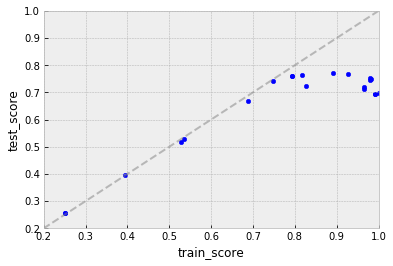

In [5]:
_ = result.plot('train_score','test_score', kind='scatter')
_ = plt.xlim(0.2,1)
_ = plt.ylim(0.2,1)
_ = plt.plot([0,1], [0,1], ls="--", alpha=0.5, c='gray')

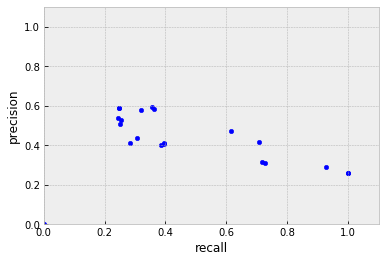

In [6]:
_ = result.plot('recall', 'precision', kind='scatter')
_ = plt.xlim(0,1.1)
_ = plt.ylim(0,1.1)

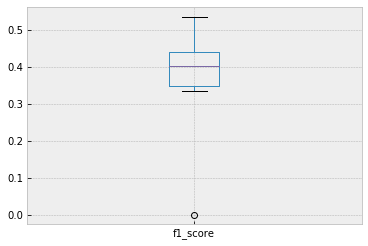

In [7]:
_ = result['f1_score'].plot(kind='box')

In [8]:
result.reset_index(drop=True, inplace=True)
result.head()

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,min_samples_leaf,max_features,max_depth,criterion,n_estimators,min_samples_split,learning_rate,gamma,colsample_bytree
0,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,None,0.742945,0.748159,2422,0,838,0,0.000000,0.000000,0.000000,"[[-9.233498049854785e-09, -8.542404895192725e-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.257055,0.251841,0,2422,0,838,0.408980,0.257055,1.000000,"[[1.7341144526616175e-10, -3.476104502147056e-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.05,0,"(65188, 4)",MinMax,data/clinvar_conflicting.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.395399,0.393457,512,1910,61,777,0.440851,0.289170,0.927208,"[[0.13284429181162538, -5.064108331797677, -0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.05,0,"(65188, 53)",None,data/data_cleaned4.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.257055,0.251841,0,2422,0,838,0.408980,0.257055,1.000000,"[[1.7341144657191668e-10, -3.4762990112364325e...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.05,0,"(65188, 53)",MinMax,data/data_cleaned4.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.515951,0.528598,1072,1350,228,610,0.436026,0.311224,0.727924,"[[0.027245693225715493, -5.70248924868861, -0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Get the best performing models from each type of classifier
best_models = result.iloc[[5, 9, 15, 19]]

In [10]:
best_models.head()

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,min_samples_leaf,max_features,max_depth,criterion,n_estimators,min_samples_split,learning_rate,gamma,colsample_bytree
5,0.05,0,"(65188, 61)",MinMax,data/data_cleanednlp4.csv,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.528221,0.536106,1120,1302,236,602,0.439096,0.316176,0.718377,"[[0.026377656517386078, -5.7429100422809505, -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.669018,0.689155,1587,835,244,594,0.524041,0.415675,0.708831,"[0.040665012844616294, 0.042371603892800924, 0...",8.0,NaN,10.0,gini,NaN,NaN,NaN,NaN,NaN
15,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'sklearn.ensemble.forest.RandomForestCl...,balanced,0.725153,0.825782,1849,573,323,515,0.534787,0.473346,0.614558,"[0.10645269003065405, 0.037197944082905, 0.200...",1.0,NaN,15.0,NaN,500.0,6.0,NaN,NaN,NaN
19,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'xgboost.sklearn.XGBClassifier'>,NaN,0.769325,0.926221,2203,219,533,305,0.447871,0.582061,0.363962,"[0.015140971, 0.018364254, 0.024925346, 0.0488...",NaN,NaN,7.0,NaN,500.0,NaN,0.25,0.4,0.9


In [29]:
df3 = best_models[['test_score','train_score','precision','recall','f1_score']].reset_index(drop=True)
df3['classifier_name'] = ['Logistic Regression','Decision Tree','Random Forest','XGBoost']
df3.set_index('classifier_name', inplace=True)
df3.head()

,test_score,train_score,precision,recall,f1_score
classifier_name,,,,,
Logistic Regression,0.528221,0.536106,0.316176,0.718377,0.439096
Decision Tree,0.669018,0.689155,0.415675,0.708831,0.524041
Random Forest,0.725153,0.825782,0.473346,0.614558,0.534787
XGBoost,0.769325,0.926221,0.582061,0.363962,0.447871


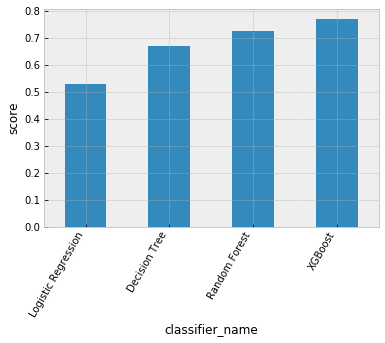

In [30]:
_ = df3['test_score'].plot(kind='bar', align='center')
_ = plt.xticks(rotation=60, ha='right')
_ = plt.ylabel('score')

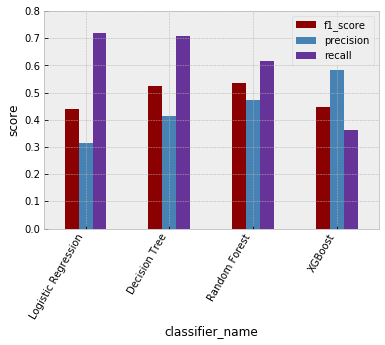

In [36]:
_ = df3[['f1_score', 'precision','recall']].plot(kind='bar', align='center', color=['darkred','steelblue','rebeccapurple'])
_ = plt.xticks(rotation=60, ha='right')
_ = plt.ylim(0,0.8)
_ = plt.ylabel('score')

- The `Random Forest` model has the best f1 score out of all of the models. 
- While `XGBoost` does not have the best f1 score, it offers the best precision with the lowest recall. This may be important in the case of our problem, where we are interested in identifying variants that are conflictingly classified (positive class) 


In [14]:
feat_import = best_models[['model', 'feature_importances']].reset_index(drop=True)

In [15]:
feat_import.head()

,model,feature_importances
0,<class 'sklearn.linear_model.logistic.Logistic...,"[[0.026377656517386078, -5.7429100422809505, -..."
1,<class 'sklearn.tree.tree.DecisionTreeClassifi...,"[0.040665012844616294, 0.042371603892800924, 0..."
2,<class 'sklearn.ensemble.forest.RandomForestCl...,"[0.10645269003065405, 0.037197944082905, 0.200..."
3,<class 'xgboost.sklearn.XGBClassifier'>,"[0.015140971, 0.018364254, 0.024925346, 0.0488..."


In [16]:
feature_names = list(feature_names)

In [17]:
lr_coefs = list(feat_import.iloc[0]['feature_importances'][0])
dt_import = list(feat_import.iloc[1]['feature_importances'])
rf_import =list(feat_import.iloc[2]['feature_importances'])
xgb_import =list(feat_import.iloc[3]['feature_importances'])
importances = pd.DataFrame({'feature_names': feature_names, 'lr': lr_coefs, 'dt': dt_import, 'rf': rf_import, 'xgb': xgb_import}).set_index('feature_names')
importances.head()

,lr,dt,rf,xgb
feature_names,,,,
POS,0.026378,0.040665,0.106453,0.015141
AF_ESP,-5.742910,0.042372,0.037198,0.018364
AF_EXAC,-0.773490,0.323234,0.200217,0.024925
AF_TGP,-7.669213,0.296035,0.171948,0.048897
ORIGIN,0.386780,0.012311,0.014732,0.025035


In [18]:
lr_ranked = importances.iloc[(-np.abs(importances['lr'].values)).argsort()]
lr_ranked.head()

,lr,dt,rf,xgb
feature_names,,,,
AF_TGP,-7.669213,0.296035,0.171948,0.048897
CADD_RAW,-7.251548,0.093160,0.091358,0.015820
AF_ESP,-5.742910,0.042372,0.037198,0.018364
CADD_PHRED,1.294314,0.014787,0.041764,0.014419
CLNVC_Microsatellite,0.818345,0.000000,0.000018,0.002788


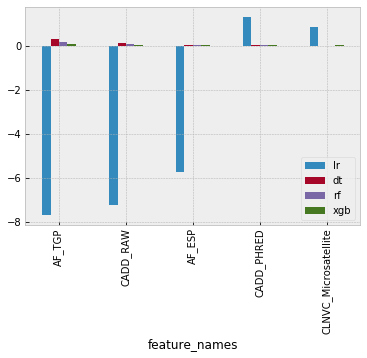

In [19]:
lr_ranked[0:5].plot(kind='bar')

In [20]:
dt_ranked = importances.iloc[(-np.abs(importances['dt'].values)).argsort()]
dt_ranked.head()

,lr,dt,rf,xgb
feature_names,,,,
AF_EXAC,-0.773490,0.323234,0.200217,0.024925
AF_TGP,-7.669213,0.296035,0.171948,0.048897
CADD_RAW,-7.251548,0.093160,0.091358,0.015820
LoFtool,0.047829,0.075196,0.096302,0.018814
AF_ESP,-5.742910,0.042372,0.037198,0.018364


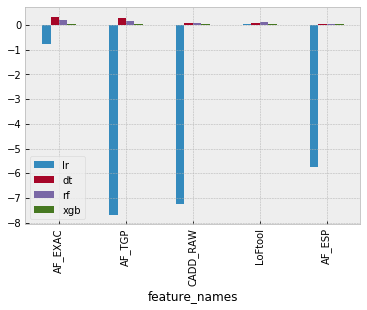

In [21]:
dt_ranked[0:5].plot(kind='bar')

In [22]:
rf_ranked = importances.iloc[(-np.abs(importances['rf'].values)).argsort()]
rf_ranked.head()

,lr,dt,rf,xgb
feature_names,,,,
AF_EXAC,-0.773490,0.323234,0.200217,0.024925
AF_TGP,-7.669213,0.296035,0.171948,0.048897
POS,0.026378,0.040665,0.106453,0.015141
LoFtool,0.047829,0.075196,0.096302,0.018814
CADD_RAW,-7.251548,0.093160,0.091358,0.015820


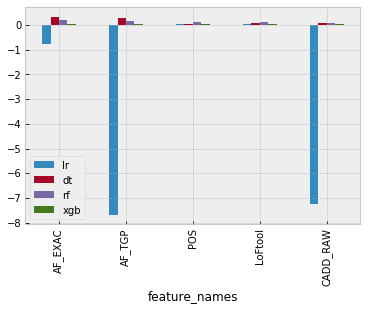

In [23]:
rf_ranked[0:5].plot(kind='bar')

In [24]:
xgb_ranked = importances.iloc[(-np.abs(importances['xgb'].values)).argsort()]
xgb_ranked.head()

,lr,dt,rf,xgb
feature_names,,,,
AF_TGP,-7.669213,0.296035,0.171948,0.048897
CHROM_13,0.125519,0.005553,0.003264,0.032134
CHROM_19,-0.100527,0.000890,0.003570,0.027166
CLNVC_Duplication,0.003800,0.000000,0.001252,0.025609
CLNVC_Deletion,-0.129738,0.004101,0.001964,0.025152


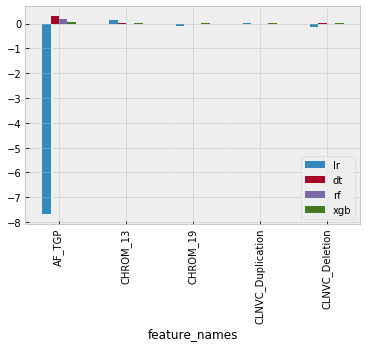

In [25]:
xgb_ranked[0:5].plot(kind='bar')

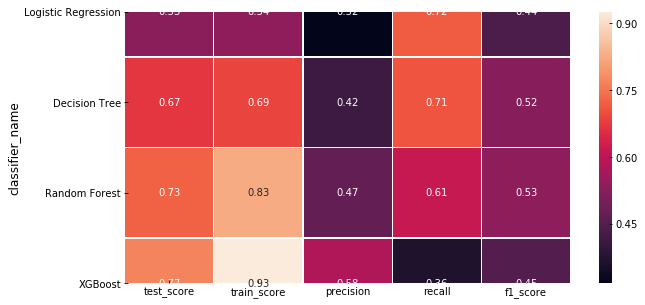

In [41]:
plt.figure(figsize=(10,5))
_ = sns.heatmap(df3, annot=True, linewidth=0.5)